Rolige sales data analysis and visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel(r"C:\Users\OLIVE\Downloads\rolige project.xlsx")
df_new = df.copy()  #copying a new dataframe to not lose the original DF
print(df_new)
print(df_new.isnull().sum())
print(df_new.duplicated().sum())
print(df_new.describe())
print(df_new.info())
print(df_new.shape)

    Week       Date  Day Month Region      Client Size  Buying Price  Costs  \
0     23 2024-06-06  Thu   Jun   Meru     Mathais    6         12163   1450   
1     24 2024-06-10  Mon   Jun   Meru  Hotel Ezri    4          4800    900   
2     24 2024-06-11  Tue   Jun   Meru   Home Team    5          6074    950   
3     25 2024-06-18  Tue   Jun   Meru  Hotel Ezri    4          3487    800   
4     25 2024-06-22  Sat   Jun   Meru      Robert    5          1932    300   
..   ...        ...  ...   ...    ...         ...  ...           ...    ...   
63    51 2024-12-16  Mon   Dec   Meru      Kennis    4          1814    200   
64    51 2024-12-18  Wed   Dec   Embu       Leola  6.1          4098    200   
65    51 2024-12-19  Thu   Dec   Meru  Hotel Ezri    4          5400   1100   
66    51 2024-12-19  Thu   Dec   Meru      Kennis    3          1360      0   
67    51 2024-12-19  Thu   Dec   Meru      Kennis    4          1914      0   

    Selling Price  Profit   Pcs  
0           18000

In [3]:
df_new = df_new.drop(columns=["Day","Month"]) #dropping 2 columns

print(df_new.memory_usage(deep=True))
print(df_new)

Index             132
Week              544
Date              544
Region           3604
Client           3869
Size             2462
Buying Price      544
Costs             544
Selling Price     544
Profit            544
Pcs               544
dtype: int64
    Week       Date Region      Client Size  Buying Price  Costs  \
0     23 2024-06-06   Meru     Mathais    6         12163   1450   
1     24 2024-06-10   Meru  Hotel Ezri    4          4800    900   
2     24 2024-06-11   Meru   Home Team    5          6074    950   
3     25 2024-06-18   Meru  Hotel Ezri    4          3487    800   
4     25 2024-06-22   Meru      Robert    5          1932    300   
..   ...        ...    ...         ...  ...           ...    ...   
63    51 2024-12-16   Meru      Kennis    4          1814    200   
64    51 2024-12-18   Embu       Leola  6.1          4098    200   
65    51 2024-12-19   Meru  Hotel Ezri    4          5400   1100   
66    51 2024-12-19   Meru      Kennis    3          1360      0 

In [5]:
#Converting all datatypes to category for better memory usage
for col in df_new.select_dtypes(include="object").columns:
    df_new[col] = df[col].astype("category")

print(df_new.memory_usage(deep=True))
print(df_new)
print(df_new.dtypes)

Index             132
Week              544
Date              544
Region            282
Client           1354
Size              699
Buying Price      544
Costs             544
Selling Price     544
Profit            544
Pcs               544
dtype: int64
    Week       Date Region      Client Size  Buying Price  Costs  \
0     23 2024-06-06   Meru     Mathais    6         12163   1450   
1     24 2024-06-10   Meru  Hotel Ezri    4          4800    900   
2     24 2024-06-11   Meru   Home Team    5          6074    950   
3     25 2024-06-18   Meru  Hotel Ezri    4          3487    800   
4     25 2024-06-22   Meru      Robert    5          1932    300   
..   ...        ...    ...         ...  ...           ...    ...   
63    51 2024-12-16   Meru      Kennis    4          1814    200   
64    51 2024-12-18   Embu       Leola  6.1          4098    200   
65    51 2024-12-19   Meru  Hotel Ezri    4          5400   1100   
66    51 2024-12-19   Meru      Kennis    3          1360      0 

In [6]:
#Add 2 columns Day and Month

df_new["Day"] = df_new["Date"].dt.day_name()
df_new["Month"] = df_new["Date"].dt.month_name()

print(df_new)

    Week       Date Region      Client Size  Buying Price  Costs  \
0     23 2024-06-06   Meru     Mathais    6         12163   1450   
1     24 2024-06-10   Meru  Hotel Ezri    4          4800    900   
2     24 2024-06-11   Meru   Home Team    5          6074    950   
3     25 2024-06-18   Meru  Hotel Ezri    4          3487    800   
4     25 2024-06-22   Meru      Robert    5          1932    300   
..   ...        ...    ...         ...  ...           ...    ...   
63    51 2024-12-16   Meru      Kennis    4          1814    200   
64    51 2024-12-18   Embu       Leola  6.1          4098    200   
65    51 2024-12-19   Meru  Hotel Ezri    4          5400   1100   
66    51 2024-12-19   Meru      Kennis    3          1360      0   
67    51 2024-12-19   Meru      Kennis    4          1914      0   

    Selling Price  Profit   Pcs        Day     Month  
0           18000    4387  60.0   Thursday      June  
1            7500    1800  30.0     Monday      June  
2           10500 

In [11]:
#using pivottable to get insights on total sales per size per day,month and week

df_sales = df_new.pivot_table(
    index="Size",
    columns="Day",
    values=["Selling Price","Profit","Pcs"],
    aggfunc=["sum","mean"],
).round(0)

print(df_sales)


              sum                                                           \
              Pcs                                                   Profit   
Day        Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
Size                                                                         
3             0.0    9.0      0.0    0.0      9.0     0.0       0.0      0   
4            30.0   70.0     60.0   60.0    100.0   140.0      10.0   1094   
5            18.0   36.0    140.0    0.0    120.0    90.0     100.0   1174   
5.1          24.0    0.0      0.0   24.0      0.0     0.0       0.0    166   
5.2         160.0    0.0      0.0    0.0    110.0     0.0       0.0   8790   
6            80.0    0.0    210.0  100.0    200.0   388.0     100.0   4500   
6.1           0.0    0.0      0.0    0.0      0.0     0.0      21.0      0   
6.2           0.0   21.0      0.0    0.0      0.0     0.0       0.0      0   
Nile Perch    0.0    0.0     57.0    0.0      0.0     0.0      7

C:\Users\OLIVE\AppData\Local\Temp\ipykernel_2148\2185098175.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_sales = df_new.pivot_table(
C:\Users\OLIVE\AppData\Local\Temp\ipykernel_2148\2185098175.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_sales = df_new.pivot_table(


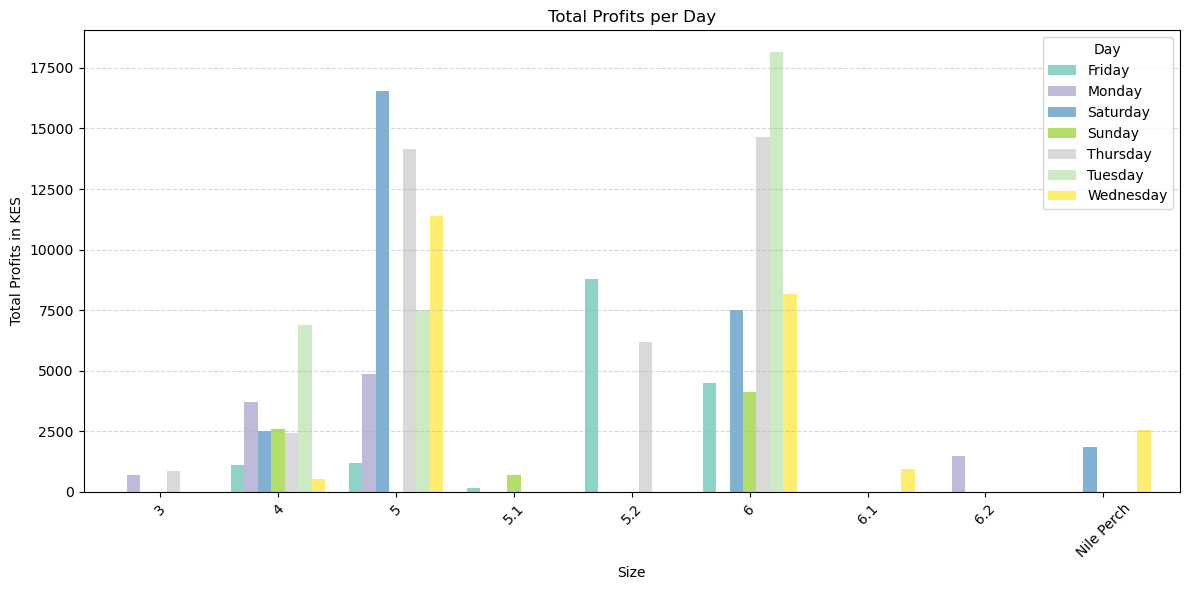

In [15]:
#Visualizing the total profits per day using matplotlib

df_profitbyday = df_sales["sum","Profit"]
df_profitbyday.plot(kind = "bar",figsize=(12, 6), colormap="Set3", width=0.8)
plt.title("Total Profits per Day")
plt.xlabel("Size")
plt.ylabel("Total Profits in KES")
plt.xticks(rotation = 45)
plt.legend(title = "Day")
plt.tight_layout()
plt.grid(axis="y",linestyle = "--",alpha = 0.5)
plt.show()

C:\Users\OLIVE\AppData\Local\Temp\ipykernel_2148\2375849396.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pcssoldperday = df_new.pivot_table(


Day         Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
Size                                                                      
3              0.0     9.0       0.0     0.0       9.0      0.0        0.0
4             30.0    70.0      60.0    60.0     100.0    140.0       10.0
5             18.0    36.0     140.0     0.0     120.0     90.0      100.0
5.1           24.0     0.0       0.0    24.0       0.0      0.0        0.0
5.2          160.0     0.0       0.0     0.0     110.0      0.0        0.0
6             80.0     0.0     210.0   100.0     200.0    388.0      100.0
6.1            0.0     0.0       0.0     0.0       0.0      0.0       21.0
6.2            0.0    21.0       0.0     0.0       0.0      0.0        0.0
Nile Perch     0.0     0.0      57.0     0.0       0.0      0.0       76.0


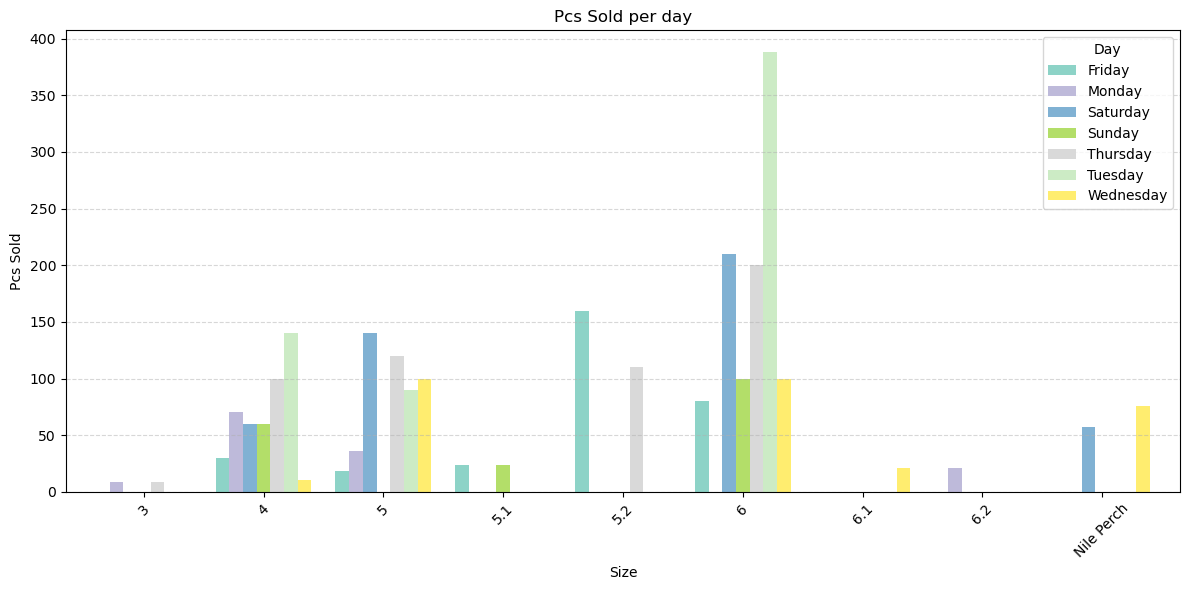

In [25]:
#using pivottable to calculate the pcs sold per day per size
df_pcssoldperday = df_new.pivot_table(
    index="Size",
    columns="Day",
    values="Pcs",
    aggfunc="sum",

).round(0)
print(df_pcssoldperday)


#visualising the pcs sold per day
df_pcssoldperday.plot(kind="bar",figsize=(12,6),colormap="Set3",width = 0.8)

plt.title("Pcs Sold per day")
plt.xlabel("Size")
plt.xticks(rotation = 45)
plt.ylabel("Pcs Sold")
plt.grid(axis="y",linestyle = "--",alpha = 0.5)
plt.legend(title = "Day")
plt.tight_layout()
plt.show()

C:\Users\OLIVE\AppData\Local\Temp\ipykernel_2148\1237778209.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_profit_per_month = df_new.pivot_table(


Month       August  December   July   June  November  October  September
Size                                                                    
3                0      1530      0      0         0        0          0
4             3034      2499   3216   4059      2531     3594        831
5            12305         0  11934   4744      8313    11239       7092
5.1              0         0      0      0       849        0          0
5.2              0      5870      0      0      2920     6168          0
6            12676      1432  10280  10556      5033     8613       8520
6.1              0       952      0      0         0        0          0
6.2              0         0      0      0         0     1497          0
Nile Perch       0         0      0      0      2550     1850          0


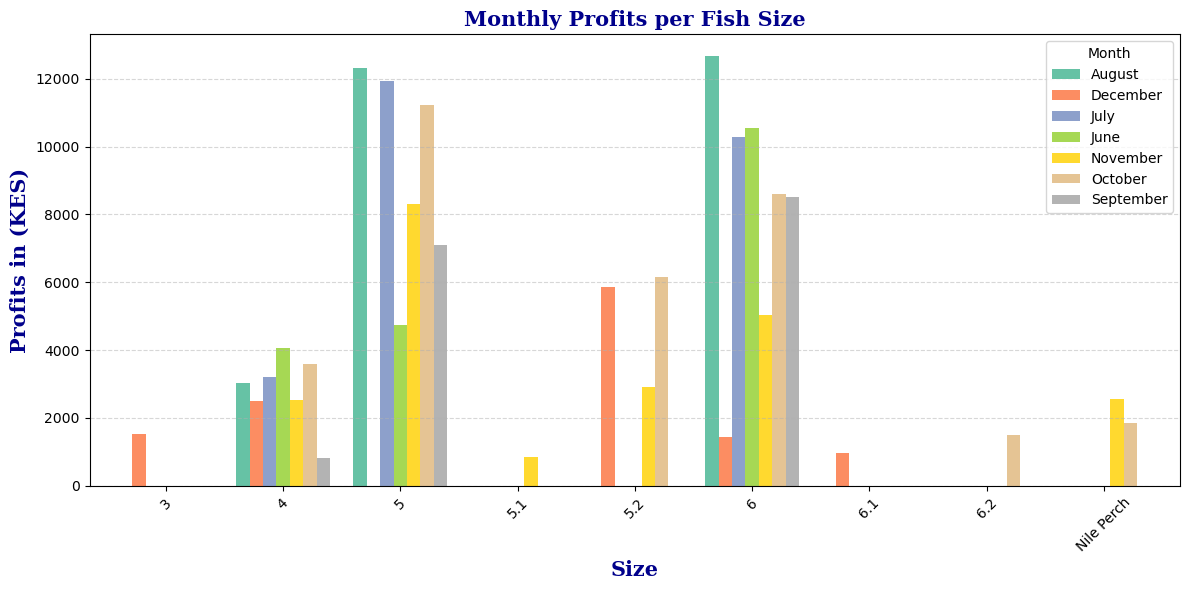

In [28]:
#using pivottable to calculate the profits per month and visualise it using matplotlib
df_profit_per_month = df_new.pivot_table(
    index="Size",
    columns="Month",
    values="Profit",
    aggfunc="sum",
).round(0)

print(df_profit_per_month)

#visualising the data using matplotlib
font = {
    "family" : "serif",
    "fontweight" : "bold",
    "fontsize" : 15,
    "color" : "darkblue"
}

df_profit_per_month.plot(kind="bar",figsize=(12,6),colormap="Set2",width = 0.8)
plt.title("Monthly Profits per Fish Size",fontdict=font)
plt.xlabel("Size",fontdict=font)
plt.xticks(rotation = 45)
plt.ylabel("Profits in (KES)",fontdict=font)
plt.grid(axis="y",linestyle = "--",alpha = 0.5)
plt.tight_layout()
plt.legend(title = "Month")
plt.show()

C:\Users\OLIVE\AppData\Local\Temp\ipykernel_2148\2236526424.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_clients = df_new.pivot_table(


Day          Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
Client                                                                     
Continental     900       0         0       0         0        0          0
David             0     700         0       0         0        0          0
Home Team         0    4144     13185       0     14145     7518      10718
Hotel Ezri     1094    3325      2498    2594      1852     6902          0
Kennis            0    1076         0       0      1426        0          0
Leola             0    1497         0       0         0        0        952
Mathais        4500       0      5578    2962     14667    18144       6472
Mavvel          166       0         0       0         0        0          0
Njeru             0       0         0       0         0        0        527
Nokras         8790       0      1850       0      6168        0       2550
Robert            0       0      3372       0         0        0        671
Snowpeak    

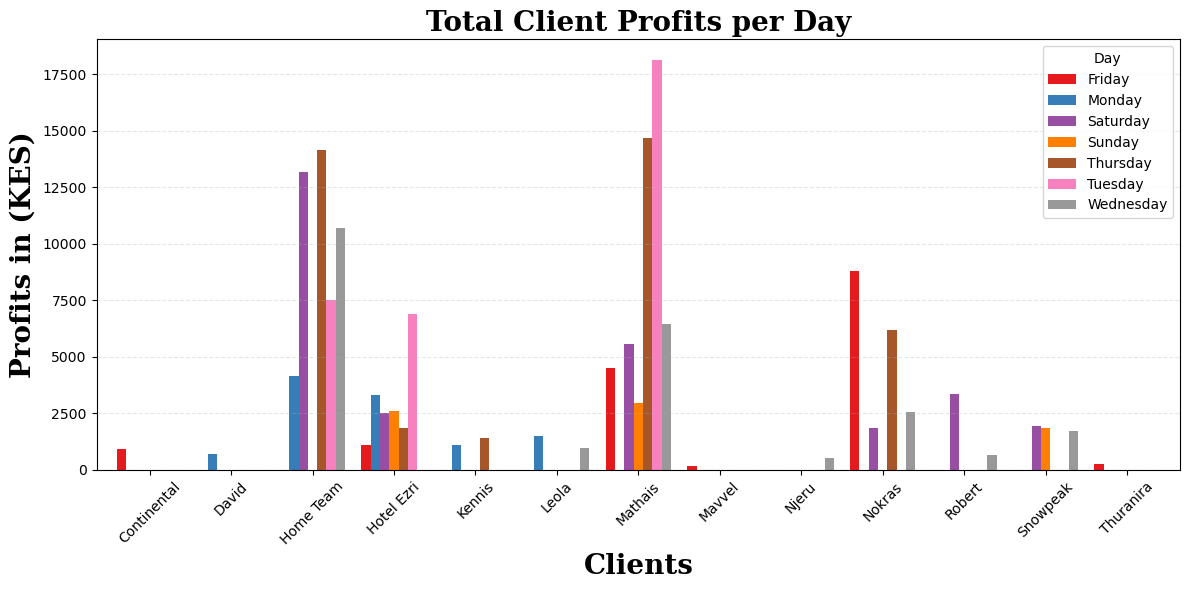

In [33]:
#using pivottabl to get all profits per client per day and visualize using matplotlib
df_clients = df_new.pivot_table(
    index="Client",
    columns="Day",
    values="Profit",
    aggfunc="sum"
).round(0)

print(df_clients)

#visualising the data using matplotlib
font = {
    "family" : "serif",
    "fontsize" : 20,
    "fontweight" : "bold",
    "color" : "k"
}

df_clients.plot(kind="bar",figsize=(12,6),width = 0.8,colormap="Set1")
plt.title("Total Client Profits per Day",fontdict=font)
plt.xlabel("Clients",fontdict=font)
plt.xticks(rotation= 45)
plt.ylabel("Profits in (KES)",fontdict=font)
plt.grid(axis="y",linestyle = "--",alpha = 0.3)
plt.legend(title = "Day")
plt.tight_layout()
plt.show()

In [32]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

C:\Users\OLIVE\AppData\Local\Temp\ipykernel_2148\1882689467.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pcssoldperday = df_new.pivot_table(


Day         Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
Size                                                                      
3              0.0     9.0       0.0     0.0       9.0      0.0        0.0
4             30.0    70.0      60.0    60.0     100.0    140.0       10.0
5             18.0    36.0     140.0     0.0     120.0     90.0      100.0
5.1           24.0     0.0       0.0    24.0       0.0      0.0        0.0
5.2          160.0     0.0       0.0     0.0     110.0      0.0        0.0
6             80.0     0.0     210.0   100.0     200.0    388.0      100.0
6.1            0.0     0.0       0.0     0.0       0.0      0.0       21.0
6.2            0.0    21.0       0.0     0.0       0.0      0.0        0.0
Nile Perch     0.0     0.0      57.0     0.0       0.0      0.0       76.0


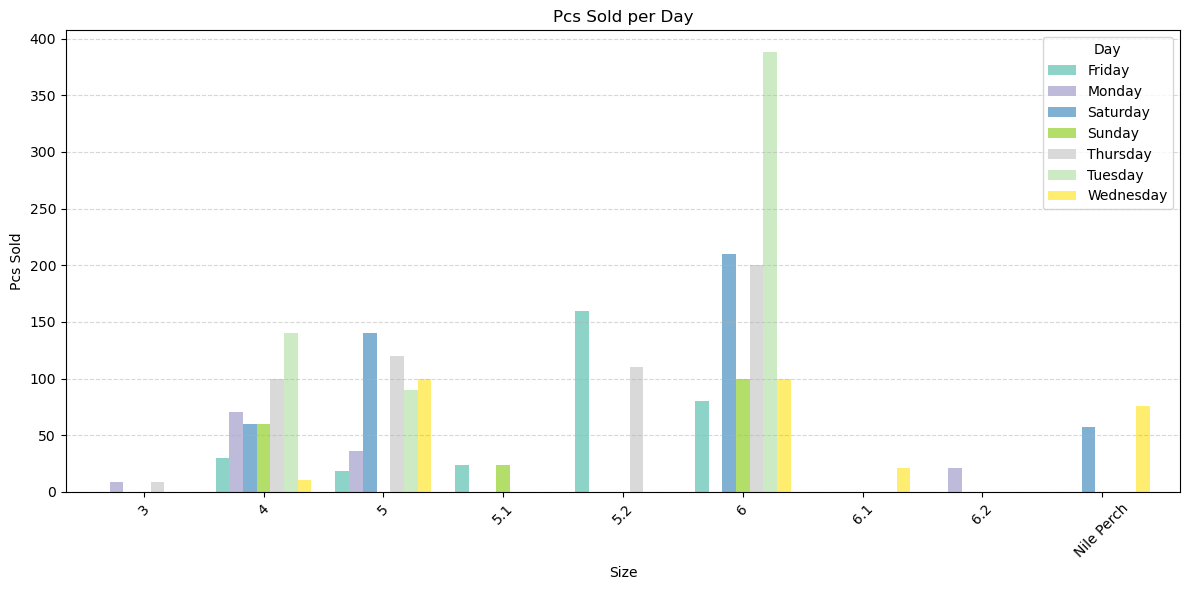

In [21]:
import matplotlib.pyplot as plt

# Using pivot_table to calculate pcs sold per day per size
df_pcssoldperday = df_new.pivot_table(
    index="Size",  # Index is 'Size' (rows)
    columns="Day",  # Columns are the days
    values="Pcs",  # Values to aggregate are the 'Pcs' column
    aggfunc="sum",  # Aggregate by sum
).round(0)  # Round the result to nearest integer

# Print the pivot table to inspect the result
print(df_pcssoldperday)

# Visualizing the pcs sold per day for each size
df_pcssoldperday.plot(kind="bar", figsize=(12, 6), colormap="Set3", width=0.8)

# Customize the plot
plt.title("Pcs Sold per Day")
plt.xlabel("Size")
plt.xticks(rotation=45)
plt.ylabel("Pcs Sold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Day")
plt.tight_layout()
plt.show()
